<a href="https://colab.research.google.com/github/snousind/Social-Media-Analysis/blob/Facebook/Facebook_cleaning_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_excel('facebook.xlsx')
df

,title,content,from,in,date,images,url,by,comments,hits,likes,shares,loves,wows,hahas,sads,angrys,thankfuls,supports,byImageUrl
0,NaN,Visit us at https://asiatimes.com/Premium con...,Asia Times,NaN,2022-12-22 16:24:43,"[""https://external-sin6-1.xx.fbcdn.net/emg1/v/...",https://www.facebook.com/asiatimesonline/posts...,Asia Times,0.0,NaN,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/186423081422922/pic...
1,NaN,"With a capacity of over 68,000 seats, Al Bayt ...",HISTORY,NaN,2022-12-09 18:00:00,"[""https://scontent-sin6-1.xx.fbcdn.net/v/t15.5...",https://www.facebook.com/HISTORYasia/posts/101...,HISTORY,3.0,NaN,177.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/285783598753/pictur...
2,NaN,Visit us at https://asiatimes.com/Premium con...,Asia Times,NaN,2022-11-16 13:24:45,"[""https://external-sin6-4.xx.fbcdn.net/emg1/v/...",https://www.facebook.com/asiatimesonline/posts...,Asia Times,0.0,NaN,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/186423081422922/pic...
3,NaN,What a game! #Argentina defeated the defending...,Hisense,NaN,2022-12-19 08:23:59,"[""https://scontent-nrt1-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/HisenseGlobal/posts/5...,Hisense,8.0,NaN,193.0,13.0,16.0,0.0,1.0,0.0,2.0,0.0,NaN,https://graph.facebook.com/492483184105033/pic...
4,NaN,UPDATE: Spain run riot over Costa Rica to go t...,Daily Monitor,NaN,2022-11-24 02:01:26,"[""https://scontent-nrt1-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/DailyMonitor/posts/10...,Daily Monitor,13.0,NaN,228.0,2.0,3.0,6.0,2.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/105583497196/pictur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,TUDN MEX──在 2022 FIFA World Cup Qatar 。,� Un XI alternativo que no podrá estar en Qata...,TUDN MEX,NaN,2022-11-18 01:51:57,"[""https://scontent-sin6-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/tudnmex/posts/1016059...,TUDN MEX,1831.0,NaN,4190.0,521.0,765.0,46.0,256.0,2233.0,64.0,0.0,NaN,https://graph.facebook.com/22653382339/picture...
17148,NaN,�� ��� ��� ������� ��?Qatar University announc...,TUDN USA,NaN,2022-12-29 01:35:47,"[""https://scontent-sin6-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/tudnusa/posts/1016059...,TUDN USA,43.0,NaN,111.0,4.0,17.0,2.0,54.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/173155703431/pictur...
17149,NaN,There were allegations that World Cup host Qat...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17150,NaN,Recent reports indicate he will receive around...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(['title', 'in', 'images', 'url', 'hits', 'supports', 'byImageUrl', 'thankfuls'], axis=1)

In [ ]:
df = df.drop([17151,17150,17149])

In [ ]:
df.isna().sum()

content     0
from        0
date        0
by          0
comments    0
likes       0
shares      0
loves       0
wows        0
hahas       0
sads        0
angrys      0
dtype: int64

In [ ]:
df.dtypes

content             object
from                object
date        datetime64[ns]
by                  object
comments           float64
likes              float64
shares             float64
loves              float64
wows               float64
hahas              float64
sads               float64
angrys             float64
dtype: object

In [ ]:
df.columns

Index(['content', 'from', 'date', 'by', 'comments', 'likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys'],
      dtype='object')

In [ ]:
df['from'] = df['from'].astype('string')

In [ ]:
columns_aggr = ['likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']

# Create a new column with the sum of selected columns
df['interactions'] = df[columns_aggr].sum(axis=1)

In [ ]:
reacts_sorted = df.sort_values(by='interactions', ascending = False)

In [ ]:
reacts_sorted

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
9286,We've had some special opening ceremonies �Can...,FIFA World Cup,2022-11-20 03:21:32,FIFA World Cup,48691.0,3656165.0,339926.0,1167869.0,14544.0,12343.0,2212.0,3738.0,5196797.0
10999,Can't wait for this great World Cup semi-final...,Mesut Özil,2022-12-15 02:20:37,Mesut Özil,54445.0,1779102.0,29761.0,868409.0,1603.0,6512.0,1727.0,392.0,2687506.0
14934,"Son muchos los recuerdos, buenos momentos y no...",Leo Messi,2022-11-22 04:06:08,Leo Messi,65977.0,527424.0,36493.0,513938.0,681.0,4366.0,802.0,217.0,1083921.0
10461,World Cup final � @cruzbeckhamRoad to 2022 #fi...,David Beckham,2022-12-18 23:07:03,David Beckham,7642.0,814887.0,6148.0,177540.0,679.0,514.0,60.0,153.0,999981.0
7237,Thank you for an unforgettable visit and a Wor...,Zlatan Ibrahimović,2022-12-22 00:08:16,Zlatan Ibrahimović,10244.0,713547.0,3239.0,166533.0,529.0,1429.0,99.0,253.0,885629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,As Qatar welcomes more than a million fans for...,Bristol Herald Courier,2022-11-28 22:37:02,Bristol Herald Courier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10970,The Qatar World Cup should be a watershed mome...,Guardian US sports,2022-12-20 16:06:07,Guardian US sports,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525,#Arab Fans In #Qatar Rally Behind #MoroccoArab...,Kashmir Observer,2022-12-06 01:45:31,Kashmir Observer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5324,Football v soccer: can the World Cup win a US ...,Media Guardian,2022-11-23 18:10:35,Media Guardian,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f"There are {len(df['by'].unique())} different people/pages that posted on facebook in this dataset")

There are 2215 different people/pages that posted on facebook in this dataset


In [ ]:
df['date'] = df['date'].dt.date

In [ ]:
df['content'] = df['content'].str.lower()

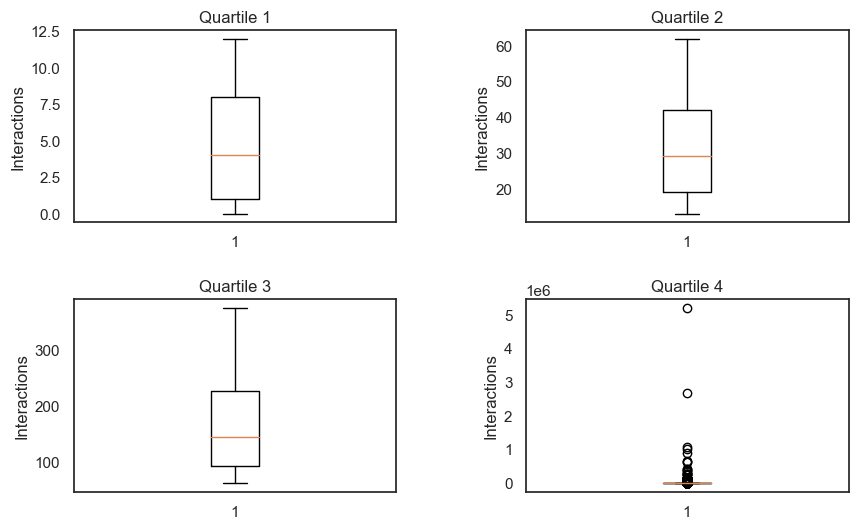

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Calculate quartiles
q1 = reacts_sorted['interactions'].quantile(0.25)
q2 = reacts_sorted['interactions'].quantile(0.5)
q3 = reacts_sorted['interactions'].quantile(0.75)

# Create boxplots for each quartile
axes[0, 0].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] <= q1])
axes[0, 0].set_title('Quartile 1')
axes[0, 1].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q1) & (reacts_sorted['interactions'] <= q2)])
axes[0, 1].set_title('Quartile 2')
axes[1, 0].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q2) & (reacts_sorted['interactions'] <= q3)])
axes[1, 0].set_title('Quartile 3')
axes[1, 1].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] > q3])
axes[1, 1].set_title('Quartile 4')

# Set y-axis labels
for ax in axes.flat:
    ax.set_ylabel('Interactions')

# Show the plot
plt.show()

In [ ]:
correlation_matrix = df[['likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']].corr()

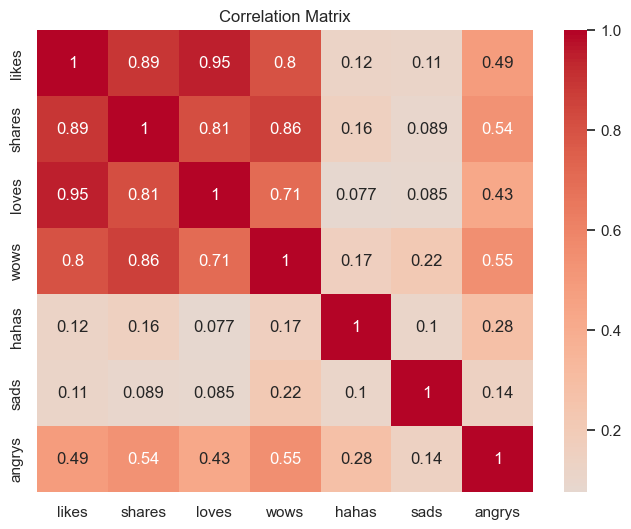

In [ ]:

sns.set(style='white')  # Set style
plt.figure(figsize=(8, 6))  # Set figure size

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
from unidecode import unidecode
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
for i in range(len(df['content'])):
    df['content'].loc[i] = unidecode(df['content'].loc[i])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\macka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\macka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\macka\AppData\Local\Temp\ipykernel_21528\517759990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'].loc[i] = unidecode(df['content'].loc[i])


In [ ]:
df['content'] = df['content'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))

In [ ]:
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['content'] = df['content'].apply(remove_punctuation)
df.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0


In [ ]:
players = pd.read_csv('player_shooting.csv')

In [ ]:
players = players['player'].tolist()

In [ ]:
surnames = [' '.join(names.split()[1:]) if len(names.split()) > 1 else names for names in players]
surnames = [string.lower() for string in surnames]
for i in range(len(surnames)):
    surnames[i] = unidecode(surnames[i])

In [ ]:
from collections import Counter

In [ ]:
all_words = []
for string in df['content']:
    words = string.split()  # Split the string into words
    all_words.extend(words)

In [ ]:
word_counts = Counter(all_words)

In [ ]:
num_of_featured = 40
most_common = word_counts.most_common()[0:num_of_featured]
word_mentions = []
words = []
for i in range(num_of_featured):
    word_mentions.append(most_common[i][1])
    words.append(most_common[i][0])

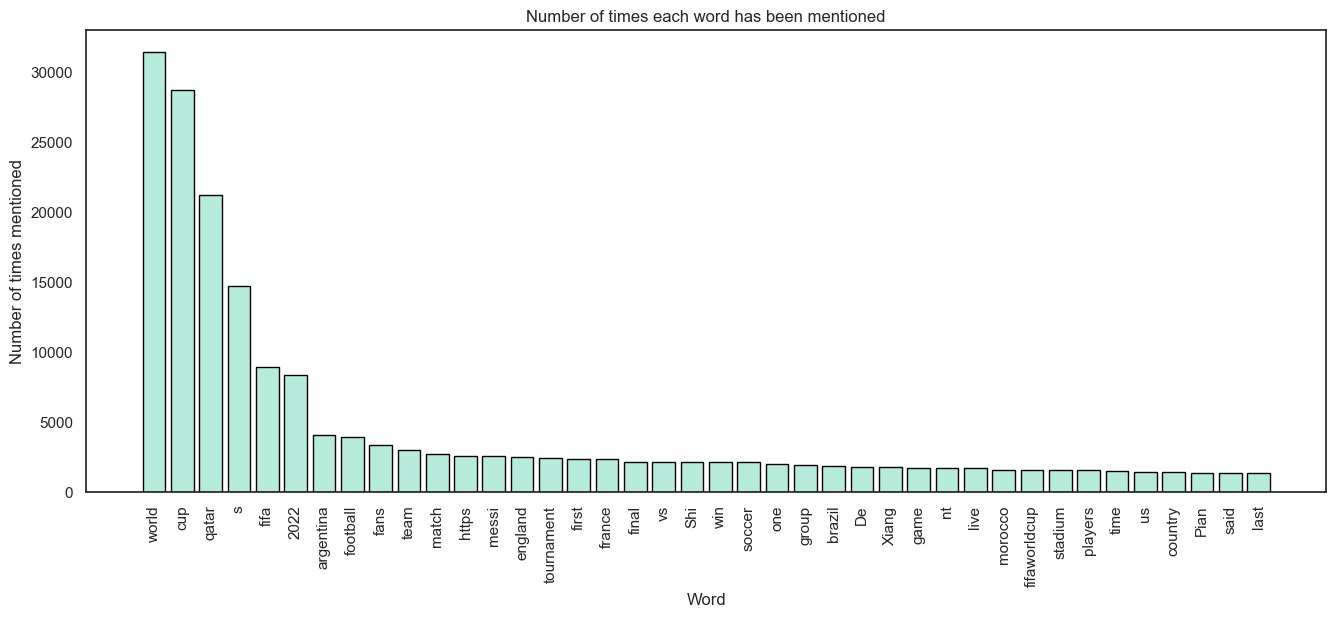

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.bar(words, word_mentions, color = '#B6EADA', edgecolor='black', linewidth=1)
plt.xlabel("Word")
plt.ylabel("Number of times mentioned")
plt.title("Number of times each word has been mentioned")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sorted_surnames = sorted(surnames, key=lambda word: word_counts.get(word, 0), reverse=True)

print("Most trending player:", sorted_surnames[0])
print("Number of mentions:", word_counts[sorted_surnames[0]])

Most trending player: messi
Number of mentions: 2518


In [ ]:
top_trenders = sorted_surnames[0:10]

In [ ]:
name_mentions = []
for i in range(10):
    name_mentions.append(word_counts[sorted_surnames[i]])

In [ ]:
name_mentions

[2518, 825, 616, 345, 324, 262, 199, 163, 163, 163]

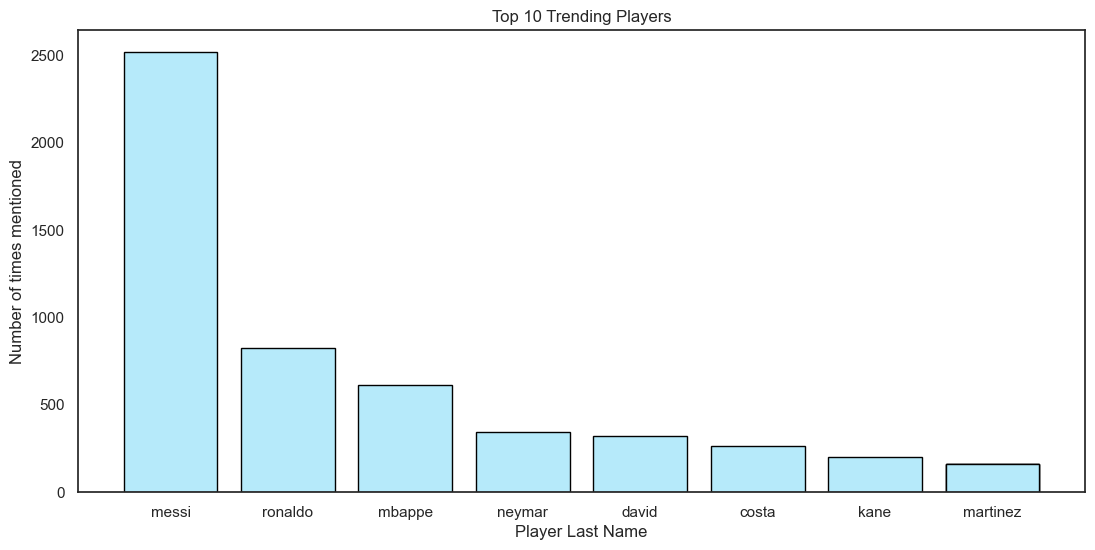

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
plt.bar(top_trenders, name_mentions, color = '#B6EAFA', edgecolor='black', linewidth=1)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.title("Top 10 Trending Players")
plt.show()

In [ ]:
word_counts['mbappe']

616

In [ ]:
word_counts['mbappé']

0

In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")

In [ ]:
facebook_pre = df[(df['date'] <= '2022-11-19')]
facebook_during = df[(df['date'] >= '2022-11-20') & (df['date'] <= '2022-12-18')]
facebook_post = df[(df['date'] >= '2022-12-19')]

In [ ]:
all_words_pre = []
for string in facebook_pre['content']:
    words = string.split()  # Split the string into words
    all_words_pre.extend(words)
word_counts_pre = Counter(all_words_pre)
sorted_surnames_pre = sorted(surnames, key=lambda word: word_counts_pre.get(word, 0), reverse=True)
top_trenders_pre = sorted_surnames_pre[0:10]
name_mentions_pre = []
for i in range(10):
    name_mentions_pre.append(word_counts_pre[sorted_surnames_pre[i]])

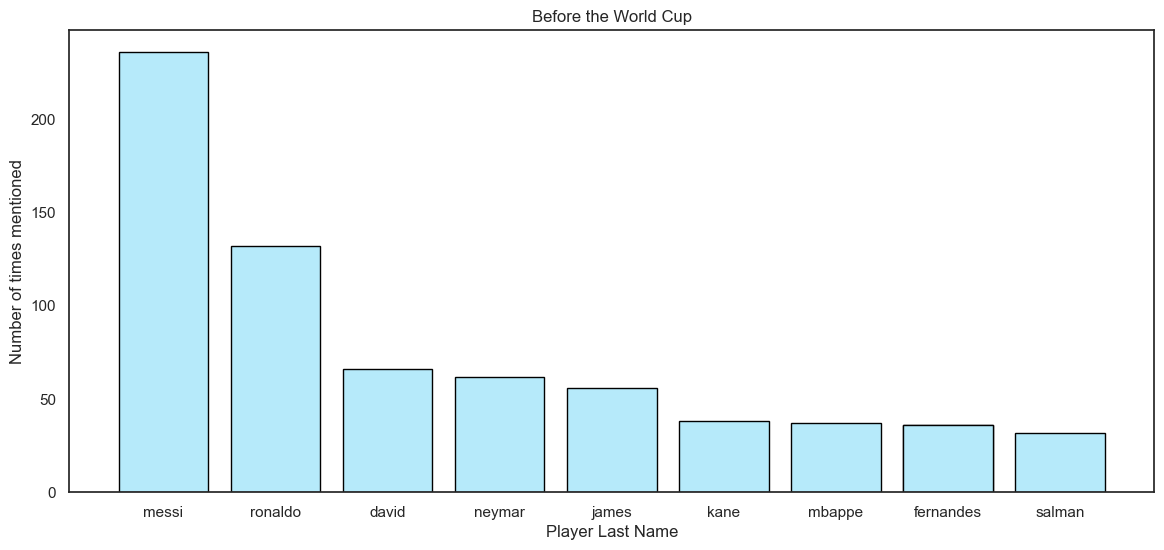

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.bar(top_trenders_pre, name_mentions_pre, color = '#B6EAFA', edgecolor='black', linewidth=1)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.title("Before the World Cup")
plt.show()

In [ ]:
all_words_during = []
for string in facebook_during['content']:
    words = string.split()  # Split the string into words
    all_words_during.extend(words)
word_counts_during = Counter(all_words_during)
sorted_surnames_during = sorted(surnames, key=lambda word: word_counts_during.get(word, 0), reverse=True)
top_trenders_during = sorted_surnames_during[0:10]
name_mentions_during = []
for i in range(10):
    name_mentions_during.append(word_counts_during[sorted_surnames_during[i]])

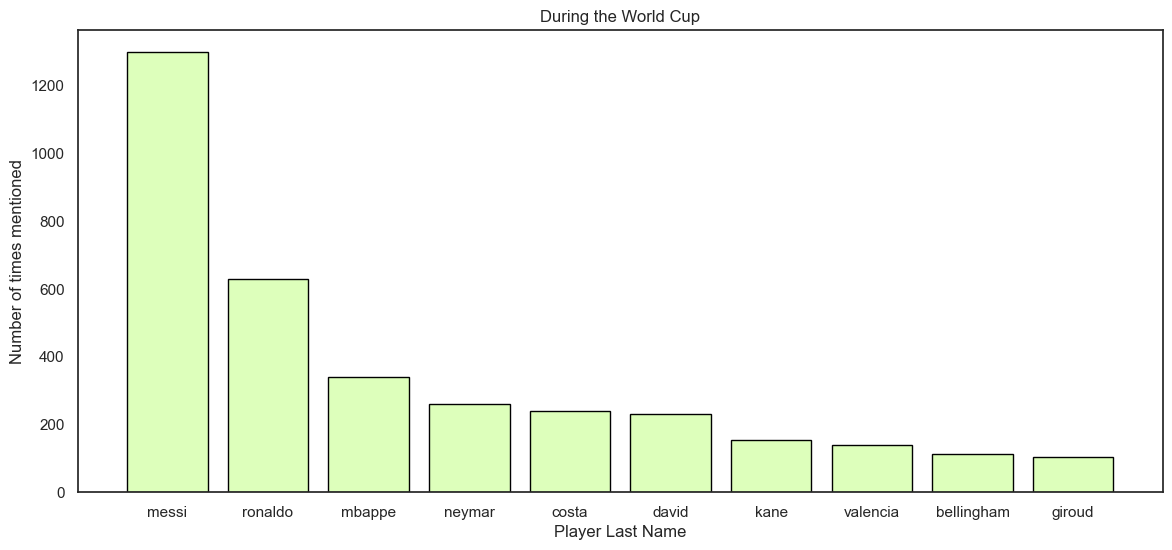

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.bar(top_trenders_during, name_mentions_during, color = '#DDFFBB', edgecolor='black', linewidth=1)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.title("During the World Cup")
plt.show()

In [ ]:
all_words_post = []
for string in facebook_post['content']:
    words = string.split()  # Split the string into words
    all_words_post.extend(words)
word_counts_post = Counter(all_words_post)
sorted_surnames_post = sorted(surnames, key=lambda word: word_counts_post.get(word, 0), reverse=True)
top_trenders_post = sorted_surnames_post[0:10]
name_mentions_post = []
for i in range(10):
    name_mentions_post.append(word_counts_post[sorted_surnames_post[i]])

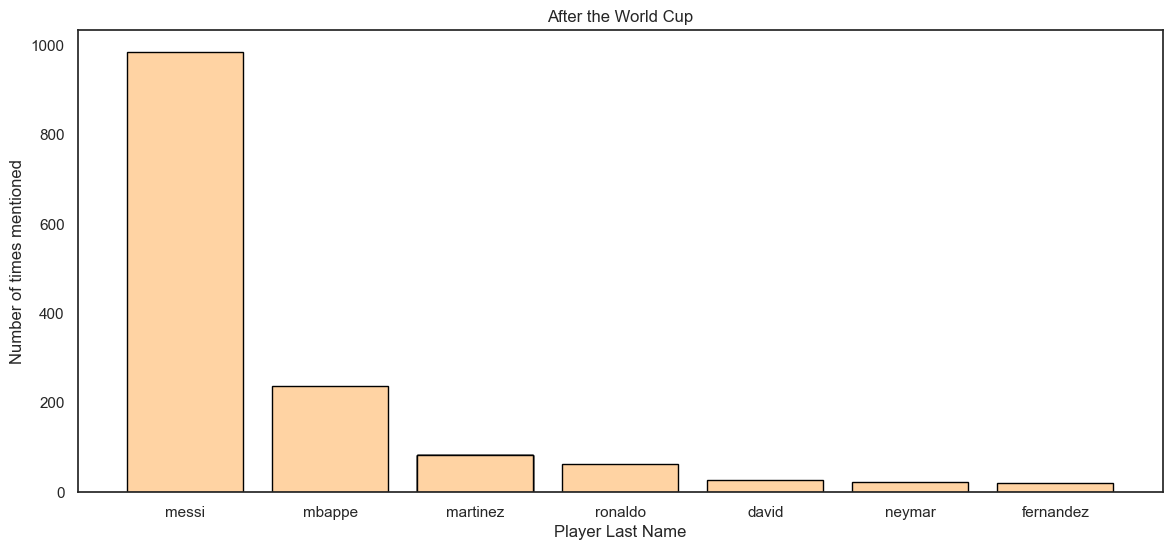

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.bar(top_trenders_post, name_mentions_post, color = '#FFD3A3', edgecolor='black', linewidth=1)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.title("After the World Cup")
plt.show()

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Example sentiment analysis
sentiment_scores = df['content'].apply(lambda x: sia.polarity_scores(x))

In [ ]:
df

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17144,via el pais english edition fifa s referees c...,EL PAÍS México,2022-11-23,EL PAÍS México,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17145,two weeks fifa president gianni infantino tak...,EL PAÍS México,2022-11-12,EL PAÍS México,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17146,escucha en apple music hayya hayya better to...,MacStore México,2022-11-29,MacStore México,7.0,4.0,0.0,2.0,0.0,0.0,0.0,6.0,12.0
17147,un xi alternativo que podra estar en qatar 202...,TUDN MEX,2022-11-18,TUDN MEX,1831.0,4190.0,521.0,765.0,46.0,256.0,2233.0,64.0,8075.0


In [ ]:
pos_sents = 0
neg_sents = 0
neut_sents = 0
all_sent_scores = []
sent_categ_totals = []
for i in range(len(df)):
    all_sent_scores.append(sentiment_scores[i]['compound'])
    if sentiment_scores[i]['compound'] > 0.05:
        pos_sents += 1
        sent_categ_totals.append("pos")
    elif sentiment_scores[i]['compound'] < -0.05:
        neg_sents += 1
        sent_categ_totals.append("neg")
    else:
        neut_sents += 1
        sent_categ_totals.append("neut")

print(f"Out of all of posts, {pos_sents} were positive, {neg_sents} were negative, and {neut_sents} were nuetral.")
df['sentiment_score'] = all_sent_scores
df['sentiment_category'] = sent_categ_totals

Out of all of posts, 11288 were positive, 5415 were negative, and 446 were nuetral.


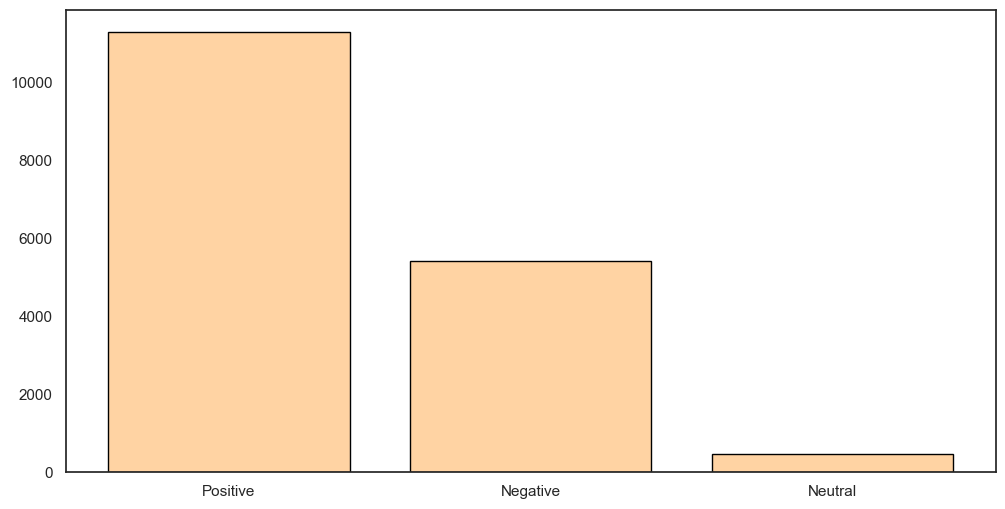

In [ ]:
sentiment_results = [pos_sents, neg_sents, neut_sents]
sentiment_categories = ["Positive", "Negative", "Neutral"]
plt.figure(figsize=(12, 6))
plt.bar(sentiment_categories, sentiment_results, color = '#FFD3A3', edgecolor='black', linewidth=1)
# plt.xlabel("Player Last Name")
# plt.ylabel("Number of times mentioned")
# plt.title("After the World Cup")
plt.show()

# Predictive Modelling

## Regression

#### Multivariate Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [ ]:
X = df[['comments', 'likes', 'shares', 'loves', 'wows', 'hahas', 'sads', 'angrys']]
Y = df['sentiment_score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)

In [ ]:
r2

-0.12368339139251283

In [ ]:
model.predict([[1000,0,1000,0,1000,0,1000,1000]])

C:\Users\macka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.32453379])

Coefficients: [-3.63801092e-05  1.87246837e-06  3.28999755e-05  5.26249367e-07
 -2.10250115e-04 -6.09928825e-08 -7.58237672e-05 -2.82405504e-04]


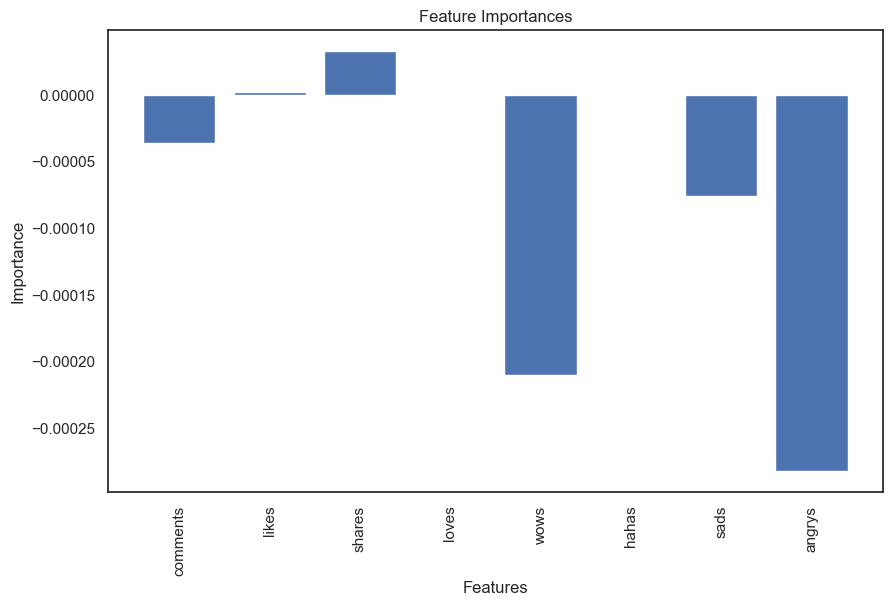

In [ ]:
print('Coefficients:', model.coef_)
plt.figure(figsize=(10, 6))
plt.bar(range(len(model.coef_)), model.coef_, tick_label=X_train.columns)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['from_encode'] = label_encoder.fit_transform(df['from'])

### Random Forest Regression

In [ ]:
df.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions,sentiment_score,sentiment_category,from_encode
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.2023,pos,131
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0,0.9022,pos,703
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,-0.4767,neg,131
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0,-0.2960,neg,744
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0,-0.4215,neg,407


In [ ]:
X = df[['sentiment_score', 'from_encode']]
Y = df['likes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)

print(f'R-squared: {r2}')

R-squared: 0.02333123695833461


### KNN Regression

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=100)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)

print(f'R-squared: {r2}')

R-squared: 0.0057139342446757


## Classification

In [ ]:
X = df[['comments', 'likes', 'shares', 'loves', 'wows', 'hahas', 'sads', 'angrys', 'from_encode']]
Y = df['sentiment_category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Random Forest Classification

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.6667638483965015


from_encode: 0.2757817699833166
likes: 0.18357460839046888
comments: 0.11479168676754738
loves: 0.0943198956431496
shares: 0.08524235296851836
hahas: 0.08442993671430436
sads: 0.06919298351067561
wows: 0.0504758691033818
angrys: 0.042190896918637366


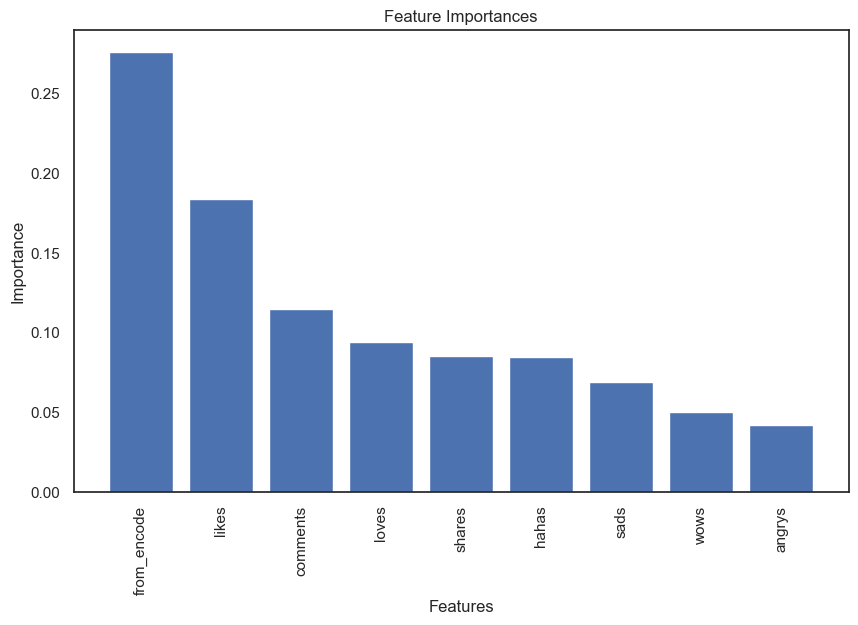

In [ ]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

sorted_feature_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_feature_indices]
sorted_feature_names = feature_names[sorted_feature_indices]

for feature_name, feature_importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{feature_name}: {feature_importance}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

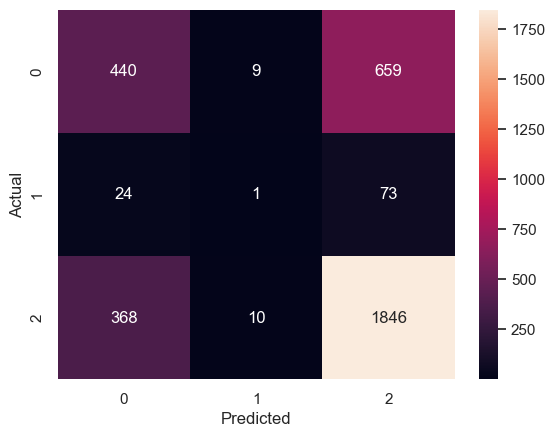

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### KNN Classification

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=52)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6574344023323615


In [ ]:
reacts_sorted = df.sort_values(by='interactions', ascending = False)
sheep = reacts_sorted[3:]
data_pos = sheep[sheep['sentiment_category'] == 'pos']['interactions']

In [ ]:
pos_median_likes = reacts_sorted[reacts_sorted['sentiment_category'] == 'pos']['likes'].median()
neg_median_likes = reacts_sorted[reacts_sorted['sentiment_category'] == 'neg']['likes'].median()
neut_median_likes = reacts_sorted[reacts_sorted['sentiment_category'] == 'neut']['likes'].median()
print(f"Out of all the posts that had a positive sentiment score, the median likes was {pos_median_likes}. Out of all of the posts that had a negative sentiment score, the median likes was {neg_median_likes}.")

Out of all the posts that had a positive sentiment score, the median likes was 50.0. Out of all of the posts that had a negative sentiment score, the median likes was 35.0.


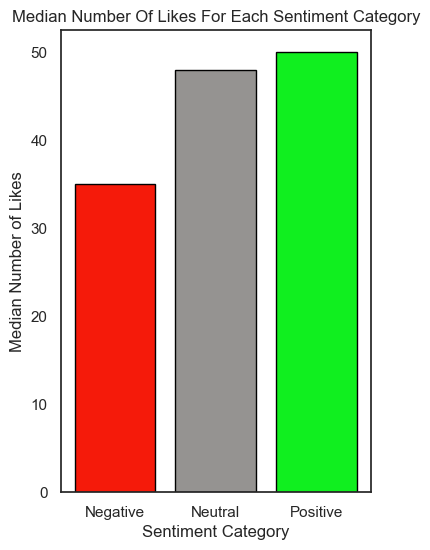

In [ ]:
plt.figure(figsize=(4, 6))
plt.bar(['Negative', 'Neutral', 'Positive'], [neg_median_likes, neut_median_likes, pos_median_likes], color = ['#f51a0a', '#959391', '#10ef1f'], edgecolor='black', linewidth=1)
plt.ylabel("Median Number of Likes")
plt.xlabel("Sentiment Category")
plt.title("Median Number Of Likes For Each Sentiment Category")
plt.show()

In [ ]:
pos_median_com = reacts_sorted[reacts_sorted['sentiment_category'] == 'pos']['comments'].median()
neg_median_com = reacts_sorted[reacts_sorted['sentiment_category'] == 'neg']['comments'].median()
neut_median_com = reacts_sorted[reacts_sorted['sentiment_category'] == 'neut']['comments'].median()

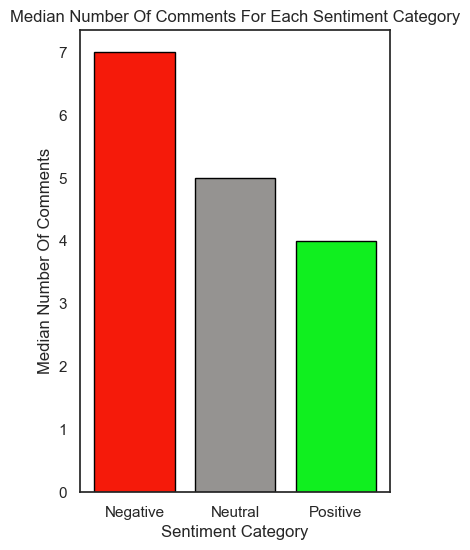

In [ ]:
plt.figure(figsize=(4, 6))
plt.bar(['Negative', 'Neutral', 'Positive'], [neg_median_com, neut_median_com, pos_median_com], color = ['#f51a0a', '#959391', '#10ef1f'], edgecolor='black', linewidth=1)
plt.ylabel("Median Number Of Comments")
plt.xlabel("Sentiment Category")
plt.title("Median Number Of Comments For Each Sentiment Category")
plt.show()

In [ ]:
pos_mean_inter = reacts_sorted[reacts_sorted['sentiment_category'] == 'pos']['interactions'].mean()
neg_mean_inter = reacts_sorted[reacts_sorted['sentiment_category'] == 'neg']['interactions'].mean()
neut_mean_inter = reacts_sorted[reacts_sorted['sentiment_category'] == 'neut']['interactions'].mean()

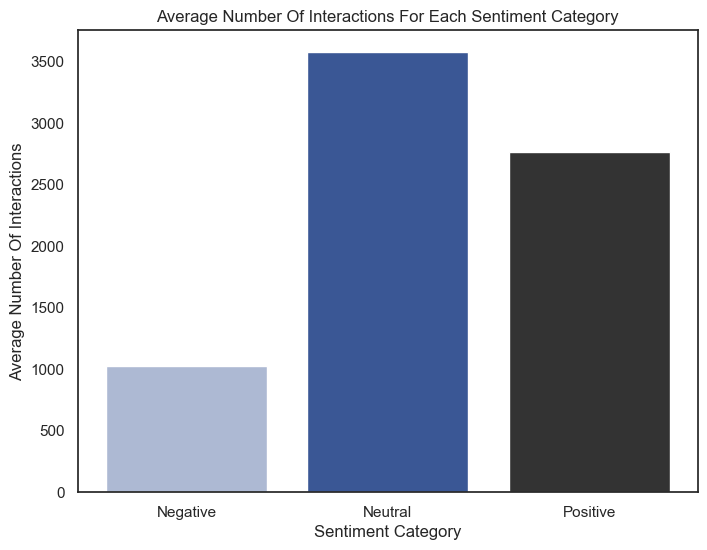

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Neutral', 'Positive'], [neg_mean_inter, neut_mean_inter, pos_mean_inter], color = ['#adb9d3', '#3a5795', '#333333'])
plt.ylabel("Average Number Of Interactions")
plt.xlabel("Sentiment Category")
plt.title("Average Number Of Interactions For Each Sentiment Category")
plt.show()

In [ ]:
pos_tot_inter = reacts_sorted[reacts_sorted['sentiment_category'] == 'pos']['interactions'].sum()
neg_tot_inter = reacts_sorted[reacts_sorted['sentiment_category'] == 'neg']['interactions'].sum()
neut_tot_inter = reacts_sorted[reacts_sorted['sentiment_category'] == 'neut']['interactions'].sum()

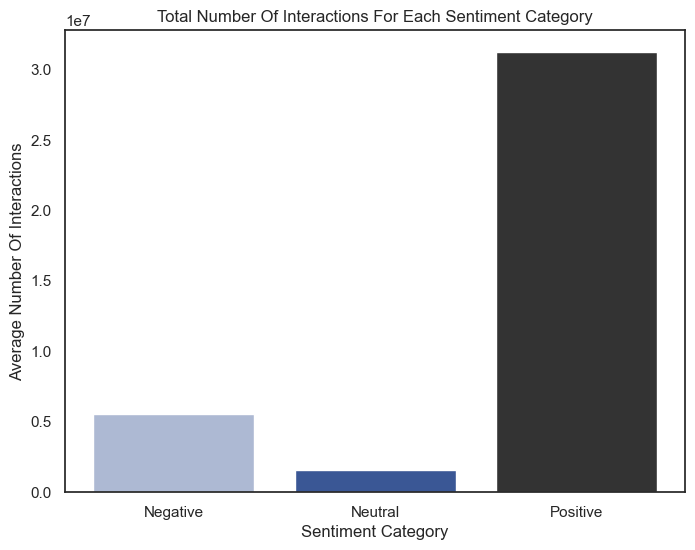

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Neutral', 'Positive'], [neg_tot_inter, neut_tot_inter, pos_tot_inter], color = ['#adb9d3', '#3a5795', '#333333'])
plt.ylabel("Average Number Of Interactions")
plt.xlabel("Sentiment Category")
plt.title("Total Number Of Interactions For Each Sentiment Category")
plt.show()

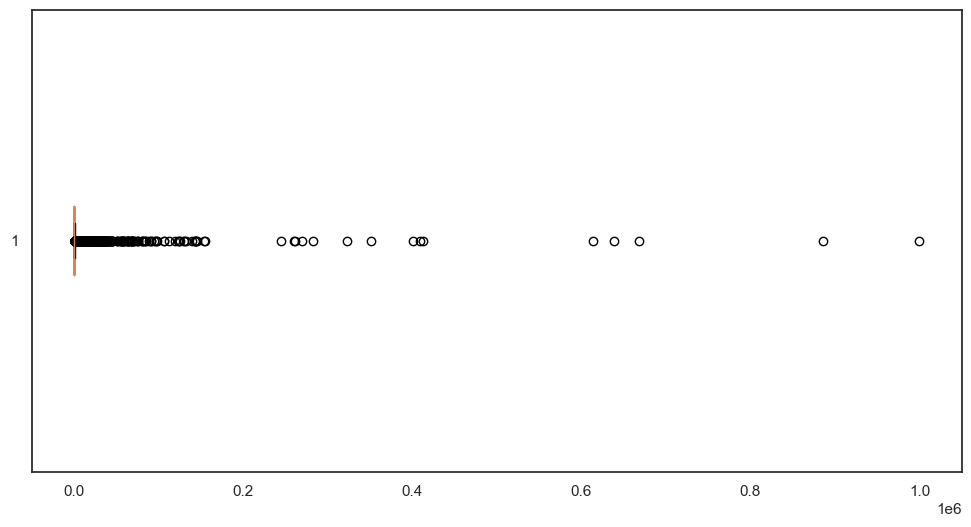

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(data_pos, vert=False)
# plt.xlabel('Year')
# plt.ylabel('Waste in tonnes (ten millions)')
# plt.title('Total core waste in Australia per year')
# plt.xticks(rotation=30)
plt.show()

In [ ]:
df

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions,sentiment_score,sentiment_category,from_encode
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.2023,pos,131
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0,0.9022,pos,703
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,-0.4767,neg,131
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0,-0.2960,neg,744
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0,-0.4215,neg,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17144,via el pais english edition fifa s referees c...,EL PAÍS México,2022-11-23,EL PAÍS México,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9313,pos,458
17145,two weeks fifa president gianni infantino tak...,EL PAÍS México,2022-11-12,EL PAÍS México,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5574,neg,458
17146,escucha en apple music hayya hayya better to...,MacStore México,2022-11-29,MacStore México,7.0,4.0,0.0,2.0,0.0,0.0,0.0,6.0,12.0,0.8020,pos,996
17147,un xi alternativo que podra estar en qatar 202...,TUDN MEX,2022-11-18,TUDN MEX,1831.0,4190.0,521.0,765.0,46.0,256.0,2233.0,64.0,8075.0,0.0000,neut,1526


In [ ]:
(df['interactions'] == 0).sum()

673

In [ ]:
X = df[['sentiment_score', 'from_encode']]
Y = df['interactions']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print(r2)

-0.000260982861748138


In [ ]:
len(Y_pred)

3430

In [ ]:
(Y_pred == 0).sum()

0

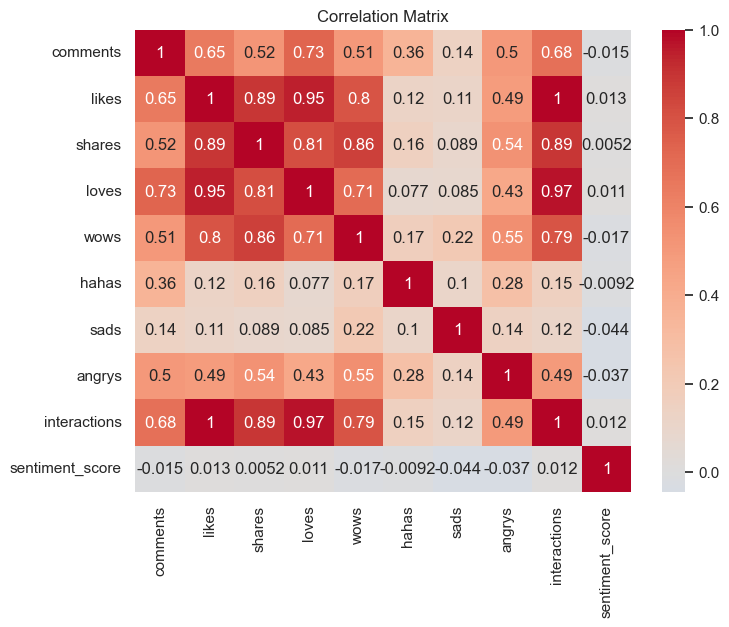

In [ ]:
correlation_matrix = df[['comments','likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys', 'interactions', 'sentiment_score']].corr()
sns.set(style='white')  # Set style
plt.figure(figsize=(8, 6))  # Set figure size

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
from textblob import TextBlob

polarity = []
subjectivity = []

for text in df["content"]:
    polarity.append(TextBlob(text).sentiment.polarity)
    subjectivity.append(TextBlob(text).sentiment.subjectivity)

df['Polarity'] = polarity
df['Subjectivity'] = subjectivity

def assign_sentiment(polarity_score):
    if polarity_score > 0:
        return 'pos'
    elif polarity_score < 0:
        return 'neg'
    else:
        return 'neutral'

# Assuming 'polarity_score' is the column containing the polarity scores in your DataFrame
df['Sentiment'] = df['Polarity'].apply(assign_sentiment)

In [ ]:
# Splitting the data into features and target variable
X = df['content']
y = df['Sentiment']

# Vectorizing the text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Training the Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicting the sentiment for the test set
y_pred = svm_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8174927113702624


In [ ]:
# Splitting the data into features and target variable
X = df['content']
y = df['Sentiment']

# Vectorizing the text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Training the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predicting the category for the test set
y_pred = nb_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6384839650145773


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import numpy as np
import seaborn as sns
import string
import unicodedata

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
df.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions,sentiment_score,sentiment_category,from_encode,Polarity,Subjectivity,Sentiment
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.2023,pos,131,0.050000,0.266667,pos
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0,0.9022,pos,703,0.130000,0.369167,pos
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,-0.4767,neg,131,-0.125000,0.616667,neg
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0,-0.2960,neg,744,-0.133333,0.466667,neg
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0,-0.4215,neg,407,0.500000,0.500000,pos


In [ ]:
com_tot = reacts_sorted['comments'].sum()
lik_tot = reacts_sorted['likes'].sum()
sha_tot = reacts_sorted['shares'].sum()
lov_tot = reacts_sorted['loves'].sum()
wow_tot = reacts_sorted['wows'].sum()
hah_tot = reacts_sorted['hahas'].sum()
sad_tot = reacts_sorted['sads'].sum()
ang_tot = reacts_sorted['angrys'].sum()

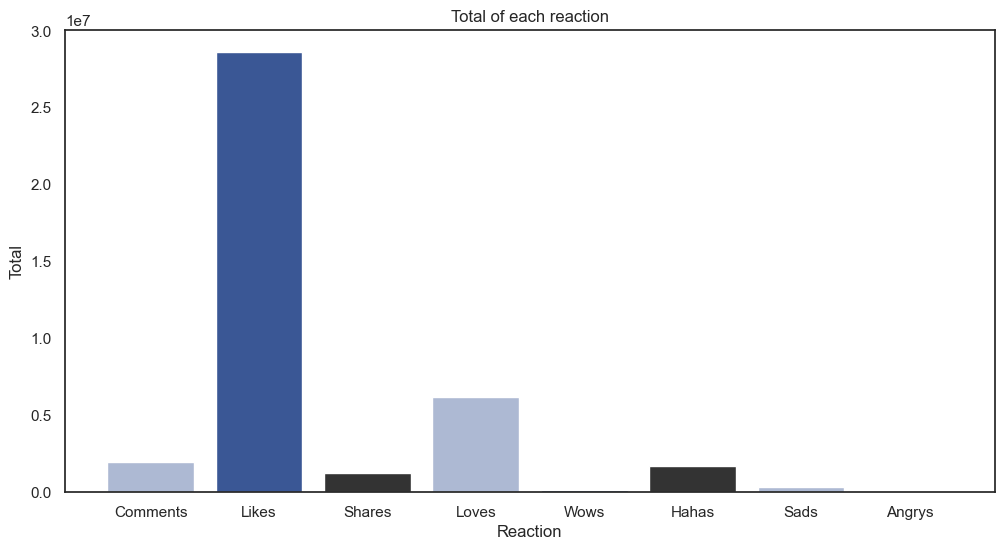

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(['Comments', 'Likes', 'Shares', 'Loves', 'Wows', 'Hahas', 'Sads', 'Angrys'], [com_tot, lik_tot, sha_tot, lov_tot, wow_tot, hah_tot, sad_tot, ang_tot], color = ['#adb9d3', '#3a5795', '#333333'])
plt.ylabel("Total")
plt.xlabel("Reaction")
plt.title("Total of each reaction")
plt.show()

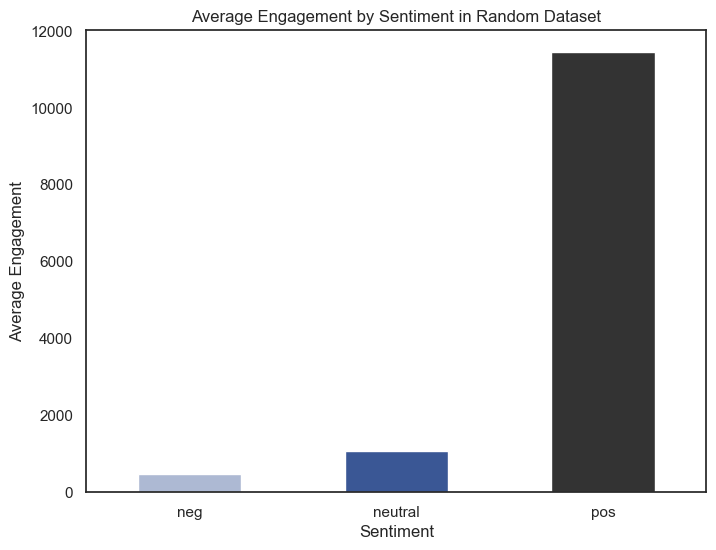

In [ ]:
np.random.seed(0)
random_data = df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(min(len(x), 300)))

# Applying the SVM model to the random dataset
X_random = random_data['content']
y_random = random_data['Sentiment']

X_vectorized_random = vectorizer.transform(X_random)
y_pred_random = svm_model.predict(X_vectorized_random)

# Creating a DataFrame with sentiment and engagement data
data_random = pd.DataFrame({'Sentiment': y_pred_random, 'Engagement': random_data['likes']})

# Calculating the average engagement for each sentiment category
average_engagement_random = data_random.groupby('Sentiment')['Engagement'].mean()

# Creating a bar chart to visualize the results
plt.figure(figsize=(8, 6))
average_engagement_random.plot(kind='bar', color=['#adb9d3', '#3a5795', '#333333'])
plt.title("Average Engagement by Sentiment in Random Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Average Engagement")
plt.xticks(range(len(average_engagement_random.index)), average_engagement_random.index, rotation=0)
plt.show()